- In part1 and part2 of our analyse on `bikeshare` dataset, we did explanatory analysis (EDA) and used Linear Regression for our prediction and Kaggle submission
- We will try to improve our prediction score on the same dataset by more complex tree-based models
- Before diving directly into the project maybe it would be better to remind the tree based models
- So in this post we will review the trees and we will apply the models to our dataset in the next post

## Trees vs Linear Models

- With Linear Regression we need to create new features to represent the **features interactions**

- Feature interactions occurs when the effects of features are combined

- For example, the **multiplication of two features** can have more predictive power on the target than the individual features

- With linear models, features must be **linearly correlated** (having non-zero correlation) to the target`.
- Trees learn the **non-linear interactions** between the features and the target

>For example, what if the $target$ goes up when 
>- the \(feature1\) is going up, and 
>- the \[feature2\] is going down? 
>- The only way to capture those interactions is to either **multiply** the features, or to use algorithms (like trees) that can handle non-linearity.

- Linear regression is parametric i.e we don't keep the training data after we get the model parameters (like **w** (weights), **b** (intercepts))

- Parametric and nonparametric models differ in the way parameters of the model are fixed or data needed each time to get determine the parameters

- Trees are considered as non-parametric models.

- Trees partitions the features space horizontally or vertically thus they create axis-parallel hyper rectangles whereas linear models can divide the space in any direction or orientation.

- This is a direct consequence of the fact that trees select a single feature at a time whereas linear models use a weighted combination of all features.

- In principle, a tree can cut up the instance space arbitrarily finely into very small regions.
- A linear model places only a single decision surface through the entire space. It has freedom in the orientation of the surface, but it is limited to a single division into two segments.

- This is a direct consequence of there being a single (linear) equation that uses all of the variables, and must fit the entire data space
#### An hyperplane by a linear model
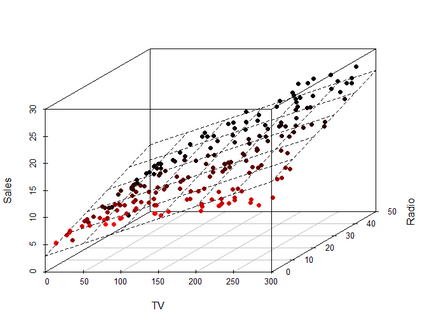

An hyperplane by a linear model divides the feature space into two

#### Trees cut the space horizontally and vertically
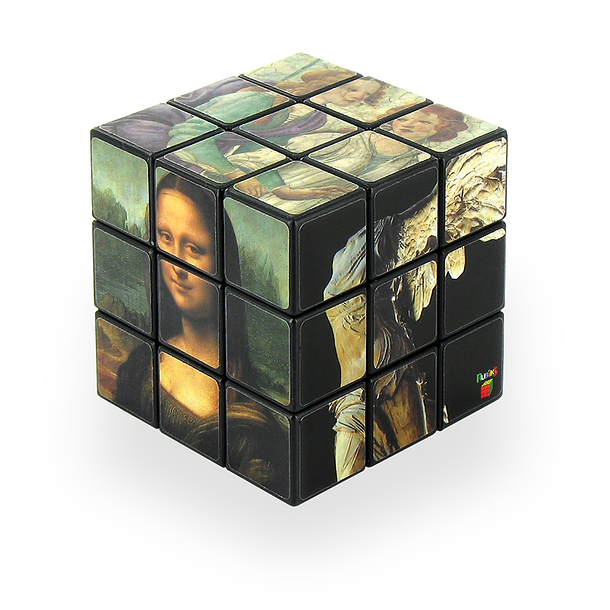

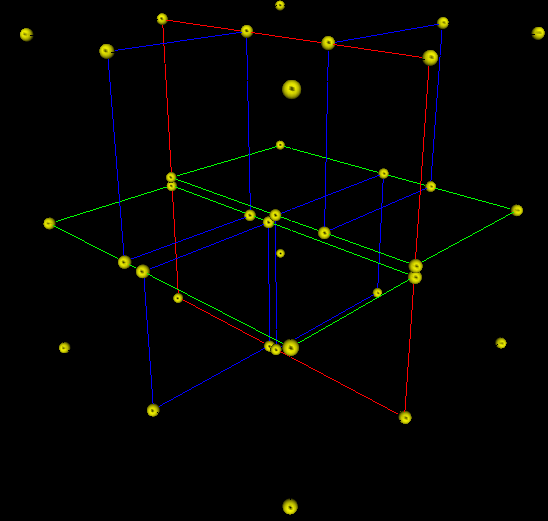

> - A 3-dimensional (with 3 features) tree. 
>- The first split (the red vertical plane) cuts the space into 2 regions, each of which is then split (by the green horizontal planes) into 2 regions. 
>- Finally, those 4 regions are split (by the 4 blue vertical planes) into 2 regions. 
>- Since there is no more splitting, the finally the whole space splitted into 8 regions

## Advantages of Decision Trees:

- Simple to interpret.
- Trees can be visualised.
- Requires little data preparation. 
- Other techniques often require 
    - data normalization, 
    - dummy variables need to be created 
    
    
- The cost of using the tree (i.e., predicting data) is **logarithmic** in the number of data points used to train the tree.
        
- Able to handle both numerical and categorical data (Sklearn only support numerical data at the moment)
- They can find non-linear relationships between features and target variables, as well as interactions between features. 
- **Quadratic, exponential, cyclical**, and other relationships can all be revealed, as long as we have enough data to support all of the necessary cuts. 

- Decision trees can also find **non-smooth behaviors**, sudden jumps, and peaks, that other models like linear regression or artificial neural networks can hide. 

- Decision tree can easily identify the most important(predictive) feautes and relation between two or more features. 
- With the help of decision trees, we can create new features that has better power to predict target variable. 


## Disadvantages of Decision Trees :

- Decision-tree learners can create **over-complex trees** that do not generalise the data well. This is called overfitting. 
- Setting constraints such as
    - the minimum number of samples required at a leaf node or
    - the maximum depth of the tree and
    - pruning (not currently supported by Sklearn) are necessary to avoid this problem
   

- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an **ensemble**.


- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to **balance the dataset** prior to fitting with the decision tree.

- Practical decision-tree learning algorithms are based on heuristic algorithms such as the **greedy algorithm** where **locally optimal decisions** are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. 
- This can be mitigated by training multiple trees in an ensemble learner, where the **features and samples are randomly sampled with replacement**.

- In principle, you can approximate anything with decision trees but in practice you cant approximate very well. Still decision trees are very efficient because in practice the feature spaces are high dimensional that is data is very sparse

## How a Regression (numerical cont. target) Tree Splits the Feature Space?

- Trees start testing features from the ones that potentially most quickly lead to a conclusion i.e most predictive or important

- In each node we test a feature
- Order of features matters
- In a step, for each feature the loss function (accuracy in case of classification) on the target variables calculated and the feature who provide the least loss is selected as the split feature

- If the features are continuous, like temperature in our example, internal nodes may test the value against a **treshold**
- Everytime tree ask `Feature1>=something` or `Feature2>=something` results in two splits of the feature space horizontally or vertically

- Decision trees are nested if-then staments

- They predict the value of a target variable by learning simple decision rules inferred from the features.

- For instance, in our dataset, decision trees learn from data with a set of **if-then-else decision rules** like if the `"hour"` is later than 5h and earlier than 6h else if `temperature` is higher than 15C then..

- The deeper the tree, the more complex the decision rules and the fitter the model.

## Steps of Splitting Process

Lets denote our features (like `temperature, humidity` etc) as $X_1, X_2,...,X_p$

For the split process there are 2 steps:

1. We divide the feature space (the set of possible values for features) into **J** distinct and non-overlapping regions: $R_1, R_2,...,R_J$

2. When we make any prediction for a sample, we check in which region(subset) our sample falls. 
    - Say it is the region $R_j$. 
    - Then the **mean** of the target values of the training samples in $R_j$ will be the predicted value of the given sample.

For instance, suppose that 
- in Step 1 we obtain 2 regions, $R_1$ and $R_2$, and 
- target mean of the training samples in the first region is `10`, while 
- target mean of the training samples in the second region is `20`. 
- Then, if a new sample is in $R_1$, we will predict a value of `10` for the target value of that sample, and if it in $R_2$ we will predict a value of `20`.

### How do we construct the regions $R1,...,RJ $ ?

We divide the space into high-dimensional rectangles, or boxes. The goal is to find boxes $R_1,...,R_J$ that minimize the
- **Mean Squared Error**, which minimizes the **L2 error** using **mean** values of the regions, or 
- **Mean Absolute Error**, which minimizes the **L1 error** using **median** values of the regions

`Mean Squared Error:`

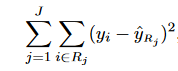

where $ŶR_j$ is the target mean for the training observations within the $j th$ box and the **$Y_i$** is the actual target value of the test observation

**Note:** 
- As seen above, regression tree split depends on the mean of the targets, since the mean is severly affected by outliers, the regression tree will suffer from outliers. <br>


- There are two main approaches to solve this problem: 
    - either removing the outliers or 
    - building the decision tree algorithm that makes splits based on the median instead of the mean, as the median is not affected by outliers. 

### Recursive Binary Splitting
For computational feasiblity, we take a top-down, greedy approach that is known as **recursive binary splitting**. 

The recursive binary splitting approach is top-down because
- it begins at the top of the tree (at which **point all observations belong to a single region**) and then 
- successively splits the features space; each split is indicated via 2 new branches further down on the tree. 

It is greedy because 
- at each step of the tree-building process, the best split is made at that particular step, 
- rather than looking ahead and picking a split that will lead to a better tree in some future step

In order to perform recursive binary splitting, 
- we first select the feature $X_j$ (jth feature) and the cutpoint $s$ such that splitting the feature space into two regions  where $X_j< s$  and $X_j≥s$ leads to the greatest possible reduction in Mean Squared Error. 


- That is, we consider **all features** $X_1,...,X_p$, and **all possible values of the cutpoint** $s$ for each of the features, and then 
- choose the feature and cutpoint such that the resulting tree has the lowest mean squared error. 

In greater detail, 
- **for any** $j$ (indice of the features) and $s$ (cutting point), we define a half-plane $R_1(j, s)$ where  $X_j<s$ and a half-plane $R_2(j, s)$ where $X_j≥s$ then

- we seeek the value of $j$ and $s$ that minimize the equation

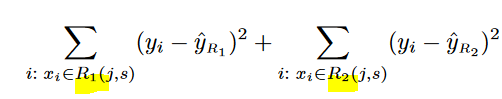

where
- $ŶR_1$ is the target mean for the training samples in $R_1(j, s)$ and
- $ŶR_2$ is the target mean for the training observations in $R_2(j, s)$. 

Finding the values of $j$ and $s$ can be done quite quickly, especially when the number of features is not too large.

Next, we repeat the process, 

- looking for the best feature and best cutpoint in order to split the data further so as to minimize the mean squared error within each of the resulting regions. 

- However, this time, instead of splitting the entire features space, we split one of the two previously identified regions.

- We now have 3 regions. 

Again, 
- we look to split one of these 3 regions further, so as to minimize the mean squared error. 

- The process continues until a user defined stopping criterion is reached
- For instance, we may tell the algorithm to stop once the number of samples per node becomes less than 5 observations.


Once the regions $R_1,...,R_J$ have been created, we predict the target for a given test observation using the mean of the training samples in the region to which that test observation belongs.

A 5-region example of this approach is shown in below. The output of recursive binary splitting on a 2-features ($X_1, X_2$) example.

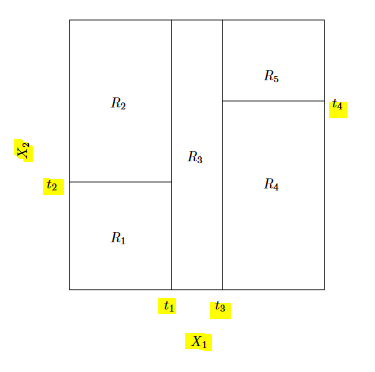

A tree corresponding to the partition in the above figure.
- First we split the feature space into 2 regions by $X_1>t_1$ and $X_1<=t_1$ and continue to partitioning the new regions
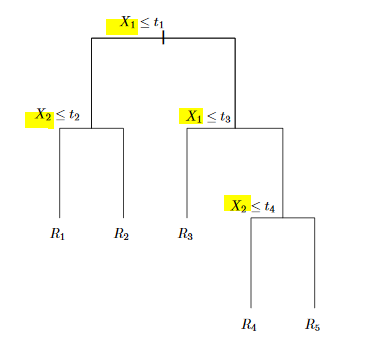

A perspective plot of the prediction surface corresponding to the tree above.
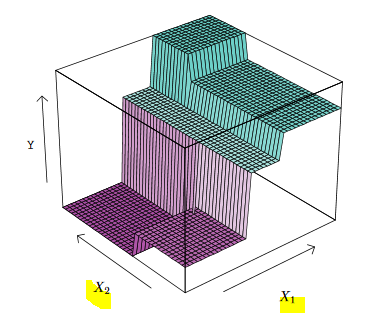

# Ensemble Methods

- Can single learners be combined in order to make a stronger learner?
- The idea behind the ensemble learners is to use the wisdom of crowd over the individuals by assembling together several algorithms or models
- Ensemble models are meta-models that aggregates the predictions of individual models based on specific formulas.


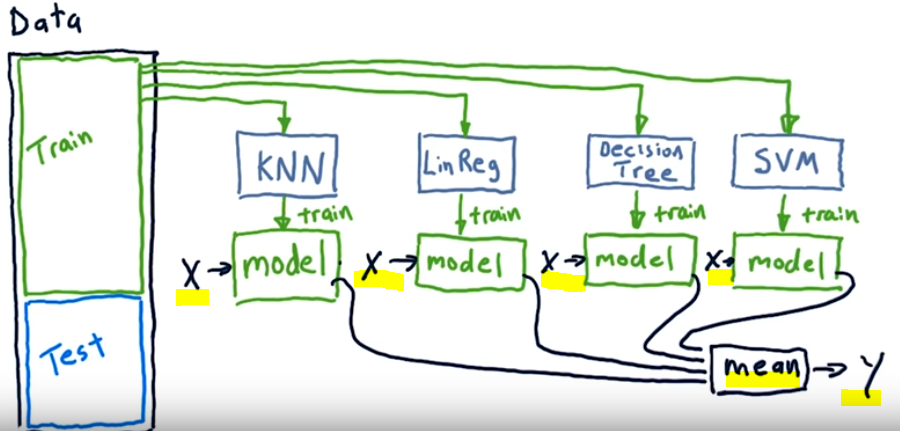

- In the above image we see a tamplate of an ensemble model
- We train single learners like KNN, Decision Tree, SVM etc with the same data (**X**)
- Then we combine all the outcomes (**y**) of the single learners. In case of regression we take the mean of the all the predictions
- For evaluation we can use the mean of the predictions for testing with the our test data

### Why ensembles might be better?
- Ensemble methods does not overfit as any of single learners
- Ensemle learners have less bias than each of the single learners
- If we combine several models of different types, we can avoid being biased by one approach.
- This typically results in less overfitting, and thus better predictions in the long run, especially on unseen data.
- Ensemble methods can 
    - decrease variance using bagging, 
    - decrease bias using a boosting, or 
    - improve predictions using stacking.

## Bootstrap Aggregating- Bagging

Another way of building ensemble learners is 
- using the same algorithm (one kind) but 
- training each learner on a different set of data
- Like in the picture we create bags of data by randomly subsetting with replacement (from the original traning dataset, bootstrap method)
-  Number of instances in the original training dataset should be equal to the number of instances in the random data bags (n’ = n). 
- Because the training data is sampled with replacement, about 60% of the instances in each bag are unique.
    
For example a Random Forest algorithm can train 100 Decision Trees on different random subsets of the original training data.


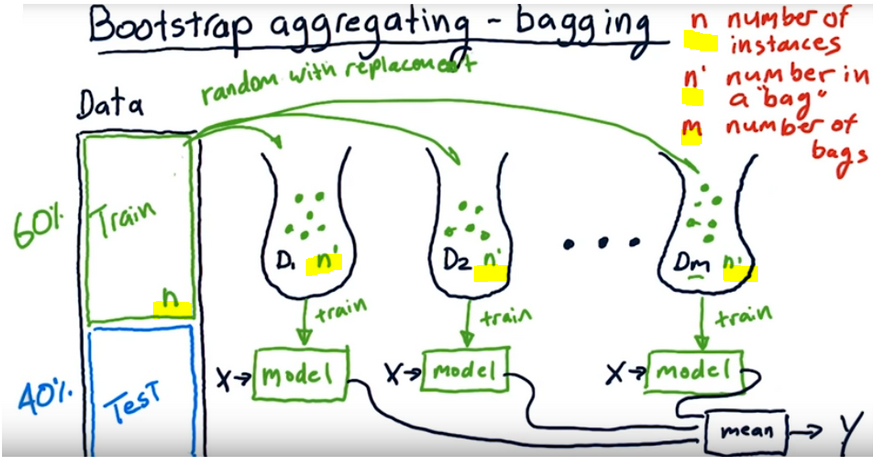

- As depicted here the single models work independently i.e models run in parallel
- As understood from the name we bootstrap the data and aggregate all the predictions

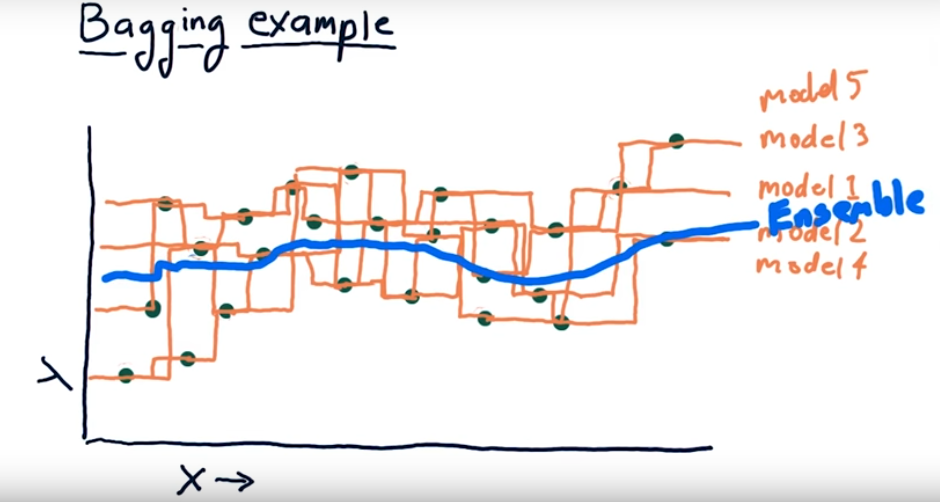

- When a new instance is fed to the ensemble, each single model makes it's prediction and the meta model collects the predictions and make the final decision either by taking the mean (regression) or voting (classification)


- In the image even though single models provide different outcomes taking the average of all the single models by an ensemble model smoothes the outcome

## Random Forest

- It is a special case of ensemble learning
- The base learners are Decision Trees
- Each estimator is trained on a different bootstrap sample having the same size as the training set
- Random Forest introduces further randomization in the training of individual trees at the feature selection level

### Randomization in Random Forests
- At the data selection level: The single estimators select the data randomly by bootstrap aggregation
- At the feature selection level: Instead of searching greedily for the best feature to create branches, it randomly samples the features without replacement
- Add more diversity and reducing the variance of the trees at the cost of equal or higher bias. 

### Training Process
1. Randomly select “d” features from total “m” features where d << m
2. Among the “d” features, choose the best split point like in the decision trees (by information gain)
3. Split the node into child nodes using the best split
4. Repeat 1 to 3 steps without using the features used before
5. Build forest by repeating the steps from the beginning 


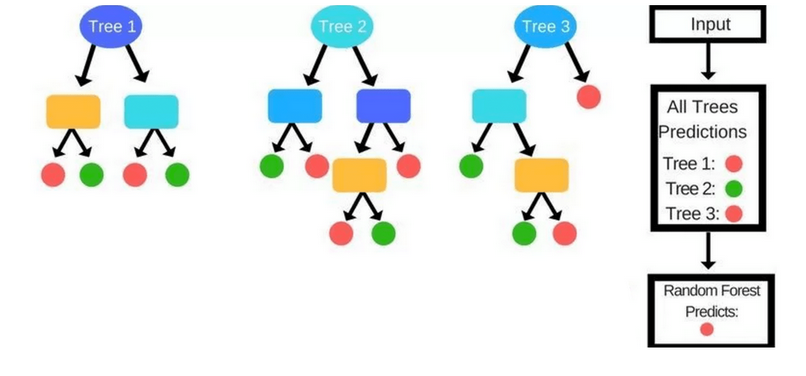

### Prediction Process
- In a Decision Tree a new instance (test sample) goes from the root node to the bottom until it falls in a leaf node. 
- In the Random Forests algorithm, each new data point goes through the same process, but now it visits all the different trees in the ensemble, which are were grown using random samples of both training data and features. 

- For Classification problems, it uses the mode or most frequent class predicted by the individual trees (also known as a majority vote), whereas for Regression tasks, it uses the average prediction of each tree.

## Boosting

Boosting 
- is slightly different than bagging
- works squentially i.e each single learner in the ensemble model is dependent  
- can track the model who failed the accurate prediction and focus on the areas that system does not perform well
- works iteratively (we massage the data and construct better and better model)

### Training method
- Initially all the points were weighted equally
- In each boosting round
- we find the worst performing single learner with the weighted training errors
- raise the weigths of the training data points which are mispredicted by the current learner
- We compute the final prediction as a linear combination of all the learners with the weights of the learners which depends on the prediction performance of them
- The way of re-weighting and combining the learners depends on the boosting type like Adaboost, Xgboost etc

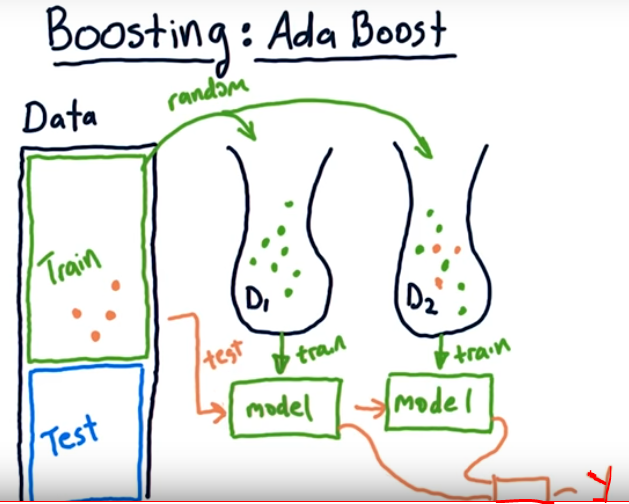

In the image we see ada boost template. 
- The orange data points are the ones that could not well predicted by the first learner 
- When the we choose data for the next bag of data, we select randomly but different from bagging method all the data points will be weighted according to the wrong predicted points. 
- The points that had significant errors (orange ones) more likely to be picked for the next data bag
- After choosing the second data set we test the overall performance of the bags and continue to choose data bag for the third learner regarding the poor predicted points

- Boosting and bagging are not new algorithms
- They are meta algorithms that wrap the single learners

Sources: <br>
https://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf#page=31 <br>
https://scikit-learn.org/stable/modules/tree.html#classification <br>
https://classroom.udacity.com/courses/ud501/lessons/4802710867/concepts/47973133930923